In [1]:
#Loading libraries
library(rpart,quietly = TRUE)
library(rpart.plot,quietly = TRUE)
library(caret,quietly = TRUE)
library(rattle)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [2]:
#find.package('caret')
#install.packages('rpart')
#install.packages("rpart.plot")
#install.packages('rattle')

In [4]:
#Reading the data set as a dataframe
df <- read.csv ("C:/Users/User/ML codes/heart.csv")

In [5]:
str(df)

'data.frame':	200 obs. of  16 variables:
 $ AGE_50   : int  42 53 53 48 53 58 48 60 59 40 ...
 $ MD_50    : int  1 1 2 4 3 2 4 1 4 3 ...
 $ SBP_50   : int  110 130 120 120 118 122 130 124 160 120 ...
 $ DBP_50   : int  65 72 90 80 74 72 90 80 100 80 ...
 $ HT_50    : int  64 69 70 72 66 69 67 74 72 69 ...
 $ WT_50    : int  147 167 222 229 134 135 165 235 206 148 ...
 $ CHOL_50  : int  291 278 342 239 243 210 219 203 269 185 ...
 $ SES      : int  2 1 4 4 3 3 3 3 5 3 ...
 $ CL_STATUS: int  8 6 8 8 8 8 8 8 8 8 ...
 $ MD_62    : int  4 2 1 2 5 4 4 1 3 3 ...
 $ SBP_62   : int  120 122 132 118 118 130 138 160 150 110 ...
 $ DBP_62   : int  78 68 90 68 56 72 86 90 100 64 ...
 $ CHOL_62  : int  271 250 304 209 261 245 275 271 291 241 ...
 $ WT_62    : int  146 165 223 227 138 136 166 226 198 152 ...
 $ IHD_DX   : int  2 9 2 3 2 2 2 3 3 2 ...
 $ DEATH    : int  1 1 1 1 1 1 1 1 1 1 ...


In [6]:
# number of rows with missing values
nrow(df) - sum(complete.cases(df))

[1] 0

In [7]:
head(df)

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
2,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
3,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
4,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
5,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
6,58,2,122,72,69,135,210,3,8,4,130,72,245,136,2,1


In [9]:
# analyzing the class  variable
table(df$DEATH,df$DEATH)

   
      0   1
  0 136   0
  1   0  64

In [10]:
nrow(df)

[1] 200

In [11]:
#set seed to ensure reproducible results
set.seed(250)
#spliting into training and test data sets in 3:1 ratio
df[,'train'] <- ifelse(runif(nrow(df))<0.75,1,0)
#separate training and test sets
train_df <- df[df$train==1,]
test_df <- df[df$train==0,]
#get column index of train flag
df_trainColNum <- grep('train',names(train_df))

In [12]:
str(train_df)

'data.frame':	151 obs. of  17 variables:
 $ AGE_50   : int  42 53 60 59 56 58 64 57 32 59 ...
 $ MD_50    : int  1 2 1 4 3 3 2 2 1 1 ...
 $ SBP_50   : int  110 120 124 160 115 140 135 110 112 140 ...
 $ DBP_50   : int  65 90 80 100 80 90 85 78 70 90 ...
 $ HT_50    : int  64 70 74 72 64 63 64 70 69 65 ...
 $ WT_50    : int  147 222 235 206 147 121 189 173 171 150 ...
 $ CHOL_50  : int  291 342 203 269 260 312 185 282 254 303 ...
 $ SES      : int  2 4 3 5 3 5 1 3 2 2 ...
 $ CL_STATUS: int  8 8 8 8 8 8 8 8 8 8 ...
 $ MD_62    : int  4 1 1 3 4 1 4 2 4 1 ...
 $ SBP_62   : int  120 132 160 150 140 120 140 144 142 205 ...
 $ DBP_62   : int  78 90 90 100 80 75 78 74 96 85 ...
 $ CHOL_62  : int  271 304 271 291 326 234 153 236 249 302 ...
 $ WT_62    : int  146 223 226 198 152 114 168 171 179 153 ...
 $ IHD_DX   : int  2 2 3 3 2 2 3 2 3 2 ...
 $ DEATH    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ train    : num  1 1 1 1 1 1 1 1 1 1 ...


In [13]:
str(test_df)

'data.frame':	49 obs. of  17 variables:
 $ AGE_50   : int  53 48 53 58 48 40 54 51 46 45 ...
 $ MD_50    : int  1 4 3 2 4 3 1 4 4 2 ...
 $ SBP_50   : int  130 120 118 122 130 120 141 120 110 108 ...
 $ DBP_50   : int  72 80 74 72 90 80 100 80 70 80 ...
 $ HT_50    : int  69 72 66 69 67 69 65 70 66 70 ...
 $ WT_50    : int  167 229 134 135 165 148 171 139 160 155 ...
 $ CHOL_50  : int  278 239 243 210 219 185 363 261 242 258 ...
 $ SES      : int  1 4 3 3 3 3 3 3 3 5 ...
 $ CL_STATUS: int  6 8 8 8 8 8 7 8 8 8 ...
 $ MD_62    : int  2 2 5 4 4 3 2 1 3 4 ...
 $ SBP_62   : int  122 118 118 130 138 110 180 130 130 138 ...
 $ DBP_62   : int  68 68 56 72 86 64 100 95 90 88 ...
 $ CHOL_62  : int  250 209 261 245 275 241 276 285 254 259 ...
 $ WT_62    : int  165 227 138 136 166 152 154 173 175 182 ...
 $ IHD_DX   : int  9 3 2 2 2 2 2 6 6 2 ...
 $ DEATH    : int  1 1 1 1 1 1 1 0 0 0 ...
 $ train    : num  0 0 0 0 0 0 0 0 0 0 ...


In [14]:
number.perfect.splits <- apply(X=df[-1], MARGIN = 2, FUN = function(col){
t <- table(df$DEATH,col)
sum(t == 0)
})

In [15]:
# Descending order of perfect splits
order <- order(number.perfect.splits,decreasing = TRUE)
number.perfect.splits <- number.perfect.splits[order]

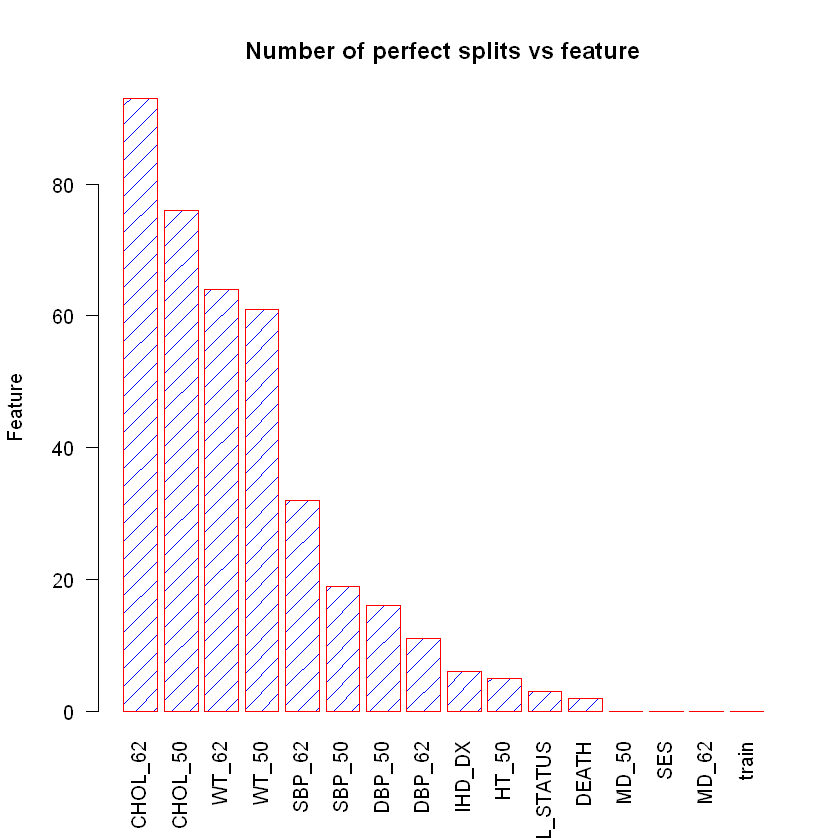

In [16]:
# Plot graph
#par(mar=c(10,2,2,2))
barplot(number.perfect.splits,main="Number of perfect splits vs feature",
xlab="",ylab="Feature",las=2,border="red",col="blue",density=10)

In [17]:
#data splicing
set.seed(12345)
train <- sample(1:nrow(df),size = ceiling(0.80*nrow(df)),replace = FALSE)
# training set
df_train <- df[train,]
# test set
df_test <- df[-train,]

In [18]:
# building the classification tree with rpart
tree <- rpart(DEATH~.,data=df_train, method = "class")

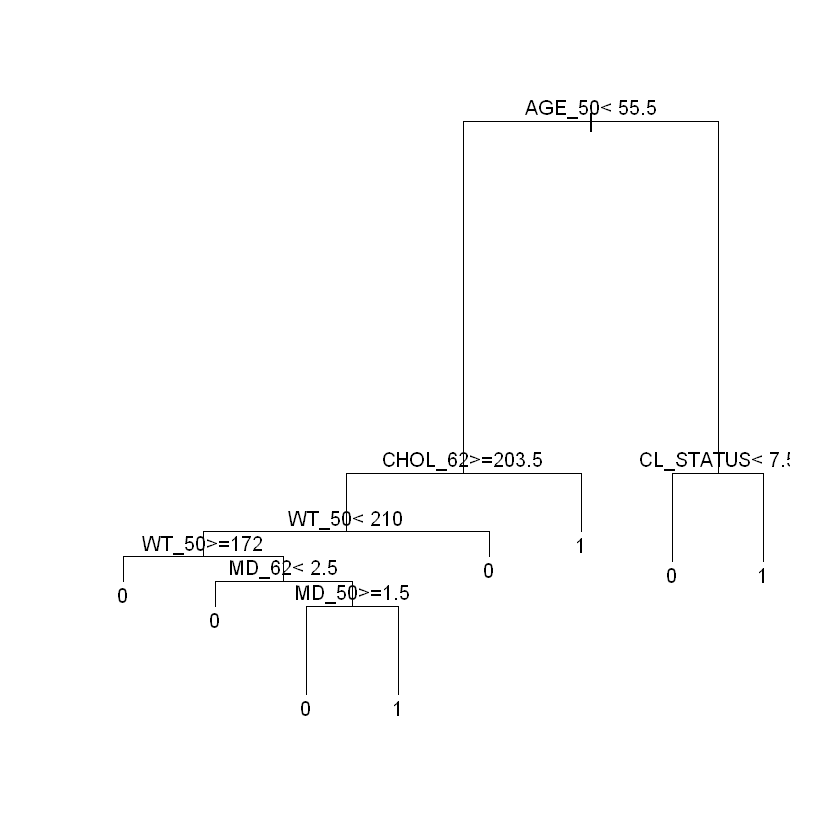

In [20]:
#Obtaining the train and test data set
#remove train flag column from train and test sets
train_df <- train_df[,-df_trainColNum]
test_df <- test_df[,-df_trainColNum]
#Get column index of predicted variable in dataset
typeColNum_df <- grep('DEATH',names(df))
#Constructing the required Decision tree model
rpart_model_df <- rpart(DEATH~.,data = train_df, method= 'class')
# Plotting the tree
plot(rpart_model_df)
text(rpart_model_df)

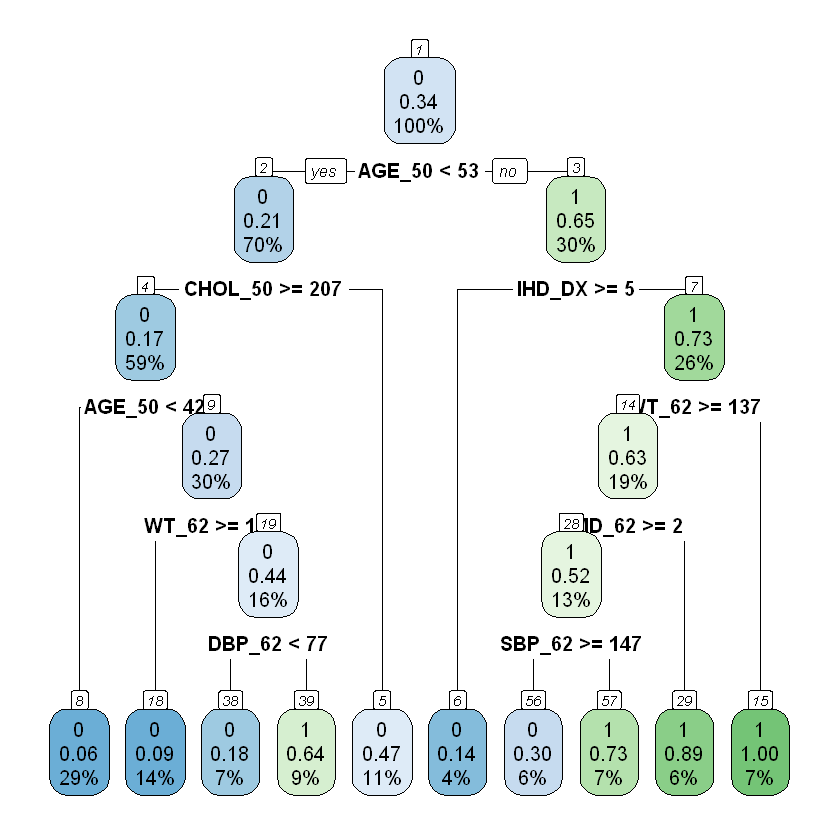

In [21]:
# Visualize the decision tree with rpart.plot
rpart.plot(tree, nn=TRUE, cex=1, box.palette = "auto")

In [24]:
#There are three level in the class variable, 0 as patient ll survive and 2 patient ll not survive
v<-df$DEATH
table(v)

v
  0   1 
136  64 

In [26]:
"""
#set seed to ensure reproducible results
set.seed(250)
#spliting into training and test data sets in 3:1 ratio
df[,'train'] <- ifelse(runif(nrow(df))<0.75,1,0)
#separate training and test sets
train_df <- df[df$train==1,]
test_df <- df[df$train==0,]
#get column index of train flag
df_trainColNum <- grep('train',names(train_df))

str(test_df)
"""

ERROR: Error in parse(text = x, srcfile = src): <text>:1:3: unexpected string constant
12: str(test_df)
13: "
      ^


In [27]:
summary(rpart_model_df)

Call:
rpart(formula = DEATH ~ ., data = train_df, method = "class")
  n= 151 

          CP nsplit rel error    xerror      xstd
1 0.26086957      0 1.0000000 1.0000000 0.1229496
2 0.06521739      1 0.7391304 0.8260870 0.1159270
3 0.04347826      2 0.6739130 0.8695652 0.1178814
4 0.01630435      3 0.6304348 0.8913043 0.1188070
5 0.01000000      7 0.5652174 0.9782609 0.1221836

Variable importance
   AGE_50   CHOL_62     WT_50     WT_62     MD_50 CL_STATUS    DBP_50    SBP_50 
       29        13        11         9         7         7         7         7 
    MD_62     HT_50    DBP_62    IHD_DX 
        5         3         2         1 

Node number 1: 151 observations,    complexity param=0.2608696
  predicted class=0  expected loss=0.3046358  P(node) =1
    class counts:   105    46
   probabilities: 0.695 0.305 
  left son=2 (119 obs) right son=3 (32 obs)
  Primary splits:
      AGE_50  < 55.5  to the left,  improve=11.904180, (0 missing)
      CHOL_62 < 203.5 to the right, improve= 

In [28]:
#Checking how good the model is
rpart_predict_df<- predict(rpart_model_df,test_df[,-typeColNum_df],type='class')
mn_df <- mean(rpart_predict_df==test_df$DEATH)
mn_df

[1] 0.5306122

In [29]:
# Constructing the confusion matrix to find out the efficiency of the model
table(pred=rpart_predict_df,true=test_df$DEATH)

    true
pred  0  1
   0 21 13
   1 10  5

In [30]:
# Constructing the confusion matrix to find out the efficiency of the model
t <- table(test_df$DEATH,rpart_predict_df)

In [31]:
#install.packages('e1071', dependencies=TRUE)
confusionMatrix(t)

Confusion Matrix and Statistics

   rpart_predict_df
     0  1
  0 21 10
  1 13  5
                                          
               Accuracy : 0.5306          
                 95% CI : (0.3827, 0.6747)
    No Information Rate : 0.6939          
    P-Value [Acc > NIR] : 0.9946          
                                          
                  Kappa : -0.0464         
                                          
 Mcnemar's Test P-Value : 0.6767          
                                          
            Sensitivity : 0.6176          
            Specificity : 0.3333          
         Pos Pred Value : 0.6774          
         Neg Pred Value : 0.2778          
             Prevalence : 0.6939          
         Detection Rate : 0.4286          
   Detection Prevalence : 0.6327          
      Balanced Accuracy : 0.4755          
                                          
       'Positive' Class : 0               
                                          